In [9]:
%time classifier = sdcvehicle.classification.fit_best_model()

loaded 8792 vehicle images and 9666 nonvehicle images
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  28.9s
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.1s remaining:    0.0s


[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  31.6s
[CV] feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=128, feature_extractor__pixels_per_cell=(6, 6), feature_extractor__cells_per_block=(3, 3), svc__C=215.443469003, total=  30.8s
[CV] feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003, total=  24.9s
[CV] feature_extractor__hist_nbins=32, feature_extractor__pixels_per_cell=(8, 8), feature_extractor__cells_per_block=(2, 2), svc__C=215.443469003 
[CV]  feature_extractor__hist_nbins=32, feature_extractor__pixels_per_

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 33.3min finished


best model performance on test: 0.984832069339
CPU times: user 34min 41s, sys: 10.1 s, total: 34min 51s
Wall time: 33min 54s


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from skimage import io
import sdcvehicle

%matplotlib inline
import matplotlib.pyplot as plt

## classifier

## detector

In [3]:
import cv2

In [4]:
test_imgs = [io.imread(f) for f in glob("../test_images/*.jpg")]

In [5]:
test_img = test_imgs[1]
test_img.shape

(720, 1280, 3)

In [6]:
detector = sdcvehicle.detection.VehicleDetector()

building vehicle classification model
loaded 8792 vehicle images and 9666 nonvehicle images


KeyboardInterrupt: 

### original image

In [8]:
model = detector.vehicle_model

In [9]:
from scipy.misc import imresize

In [10]:
# test_img = imresize(test_imgs[1], 0.55)
plot_img = test_img.copy()
for patch, bbox in detector.slide_window(test_img, (0.5, 1)):
#     cv2.rectangle(plot_img, bbox[0][::-1], bbox[1][::-1], (255, 0, 0), 1)
#     print(bbox)
    result = model.predict([patch])
#     print(result[0])
    if result[0] == "vehicle":
        cv2.rectangle(plot_img, bbox[0], bbox[1], (255, 0, 0), 3)

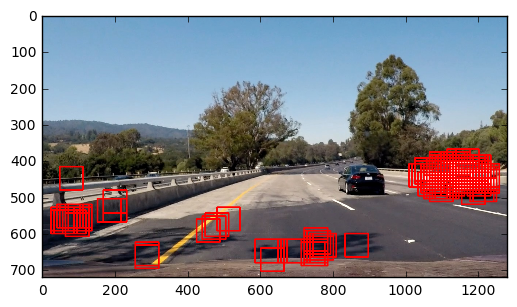

In [11]:
plt.imshow(plot_img)

### image pyramid

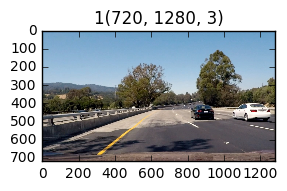

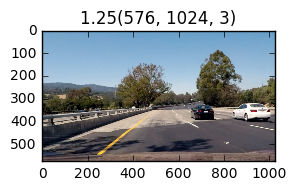

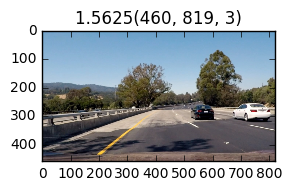

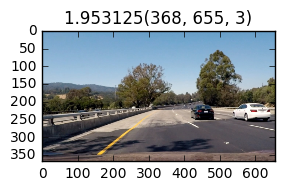

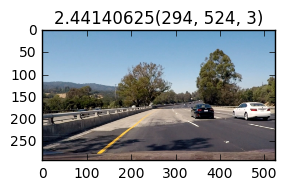

In [12]:
for img, factor in detector.get_image_pyramid(test_img):
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(str(factor)+str(img.shape))

### pyramid and sliding window

In [13]:

plot_img = test_img.copy()
for patch, bbox, multiple in detector.get_pyramid_slide_window(test_img, window_params={'rows':(0.5, 1)
                                                                             , "stride": (8, 8)}):
    result = model.predict([patch])
    if result[0] == "vehicle":
        cv2.rectangle(plot_img, bbox[0], bbox[1], (255, 0, 0), 3)
#     print(multiple)
#     cv2.rectangle(plot_img, bbox[0], bbox[1], (255, 0, 0), 3)

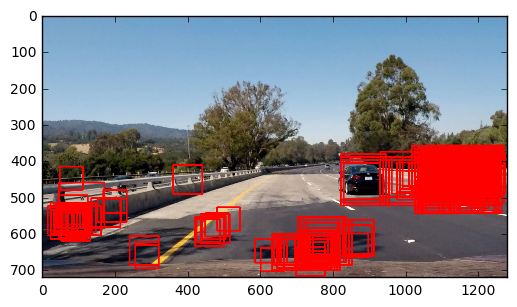

In [14]:
plt.imshow(plot_img)

### vehicle detection in image

building vehicle classification model
loaded 8792 vehicle images and 9666 nonvehicle images
ehanced the dataset with 54000 negative images
enhanced the dataset with 43960 positive samples
built model performance on test: 0.991324514688
CPU times: user 3min 59s, sys: 1.19 s, total: 4min
Wall time: 3min 56s


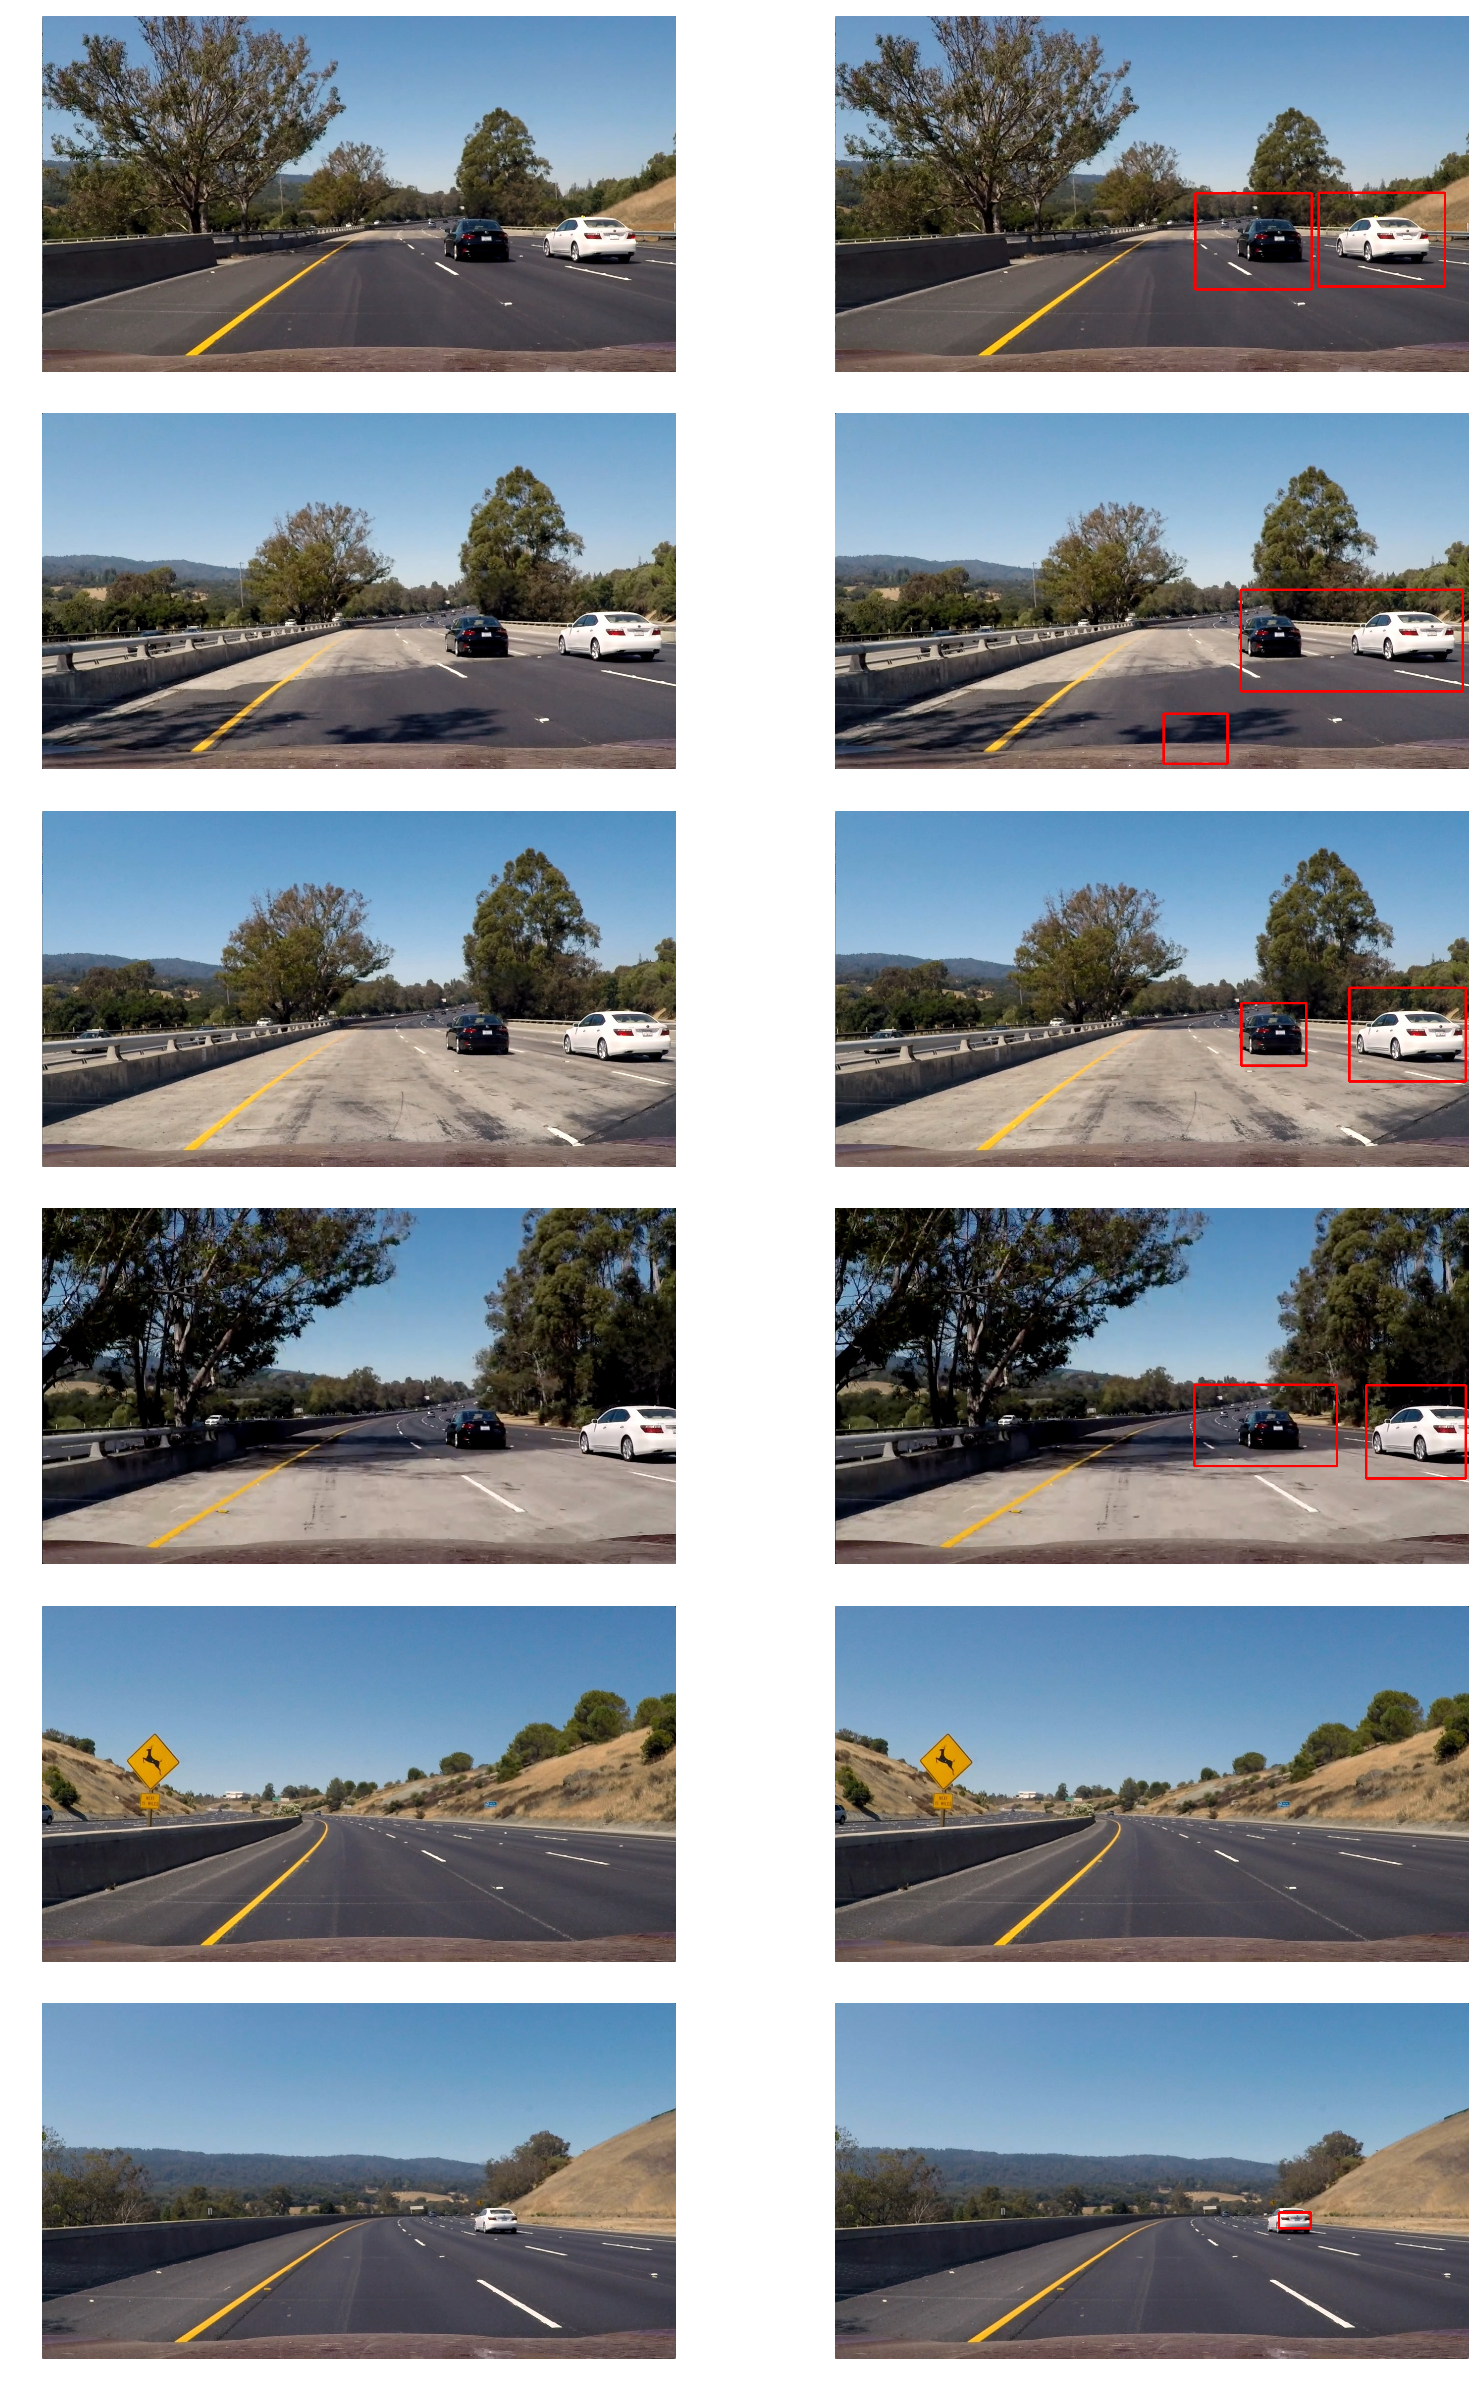

In [24]:
%%time
detector = sdcvehicle.detection.VehicleDetector()

fig, axes = plt.subplots(len(test_imgs), 2, figsize=(8*2, 4*len(test_imgs)))
fig.tight_layout()
for test_img, ax in zip(test_imgs, axes):
    plot_img = test_img.copy()
    heatmap = detector.detect_in_image(test_img)
    ax[0].imshow(test_img)
    ax[0].set_axis_off()
    ax[1].imshow(heatmap, cmap=plt.cm.gray)
    ax[1].set_axis_off()

CPU times: user 34.1 s, sys: 56 ms, total: 34.1 s
Wall time: 30.9 s


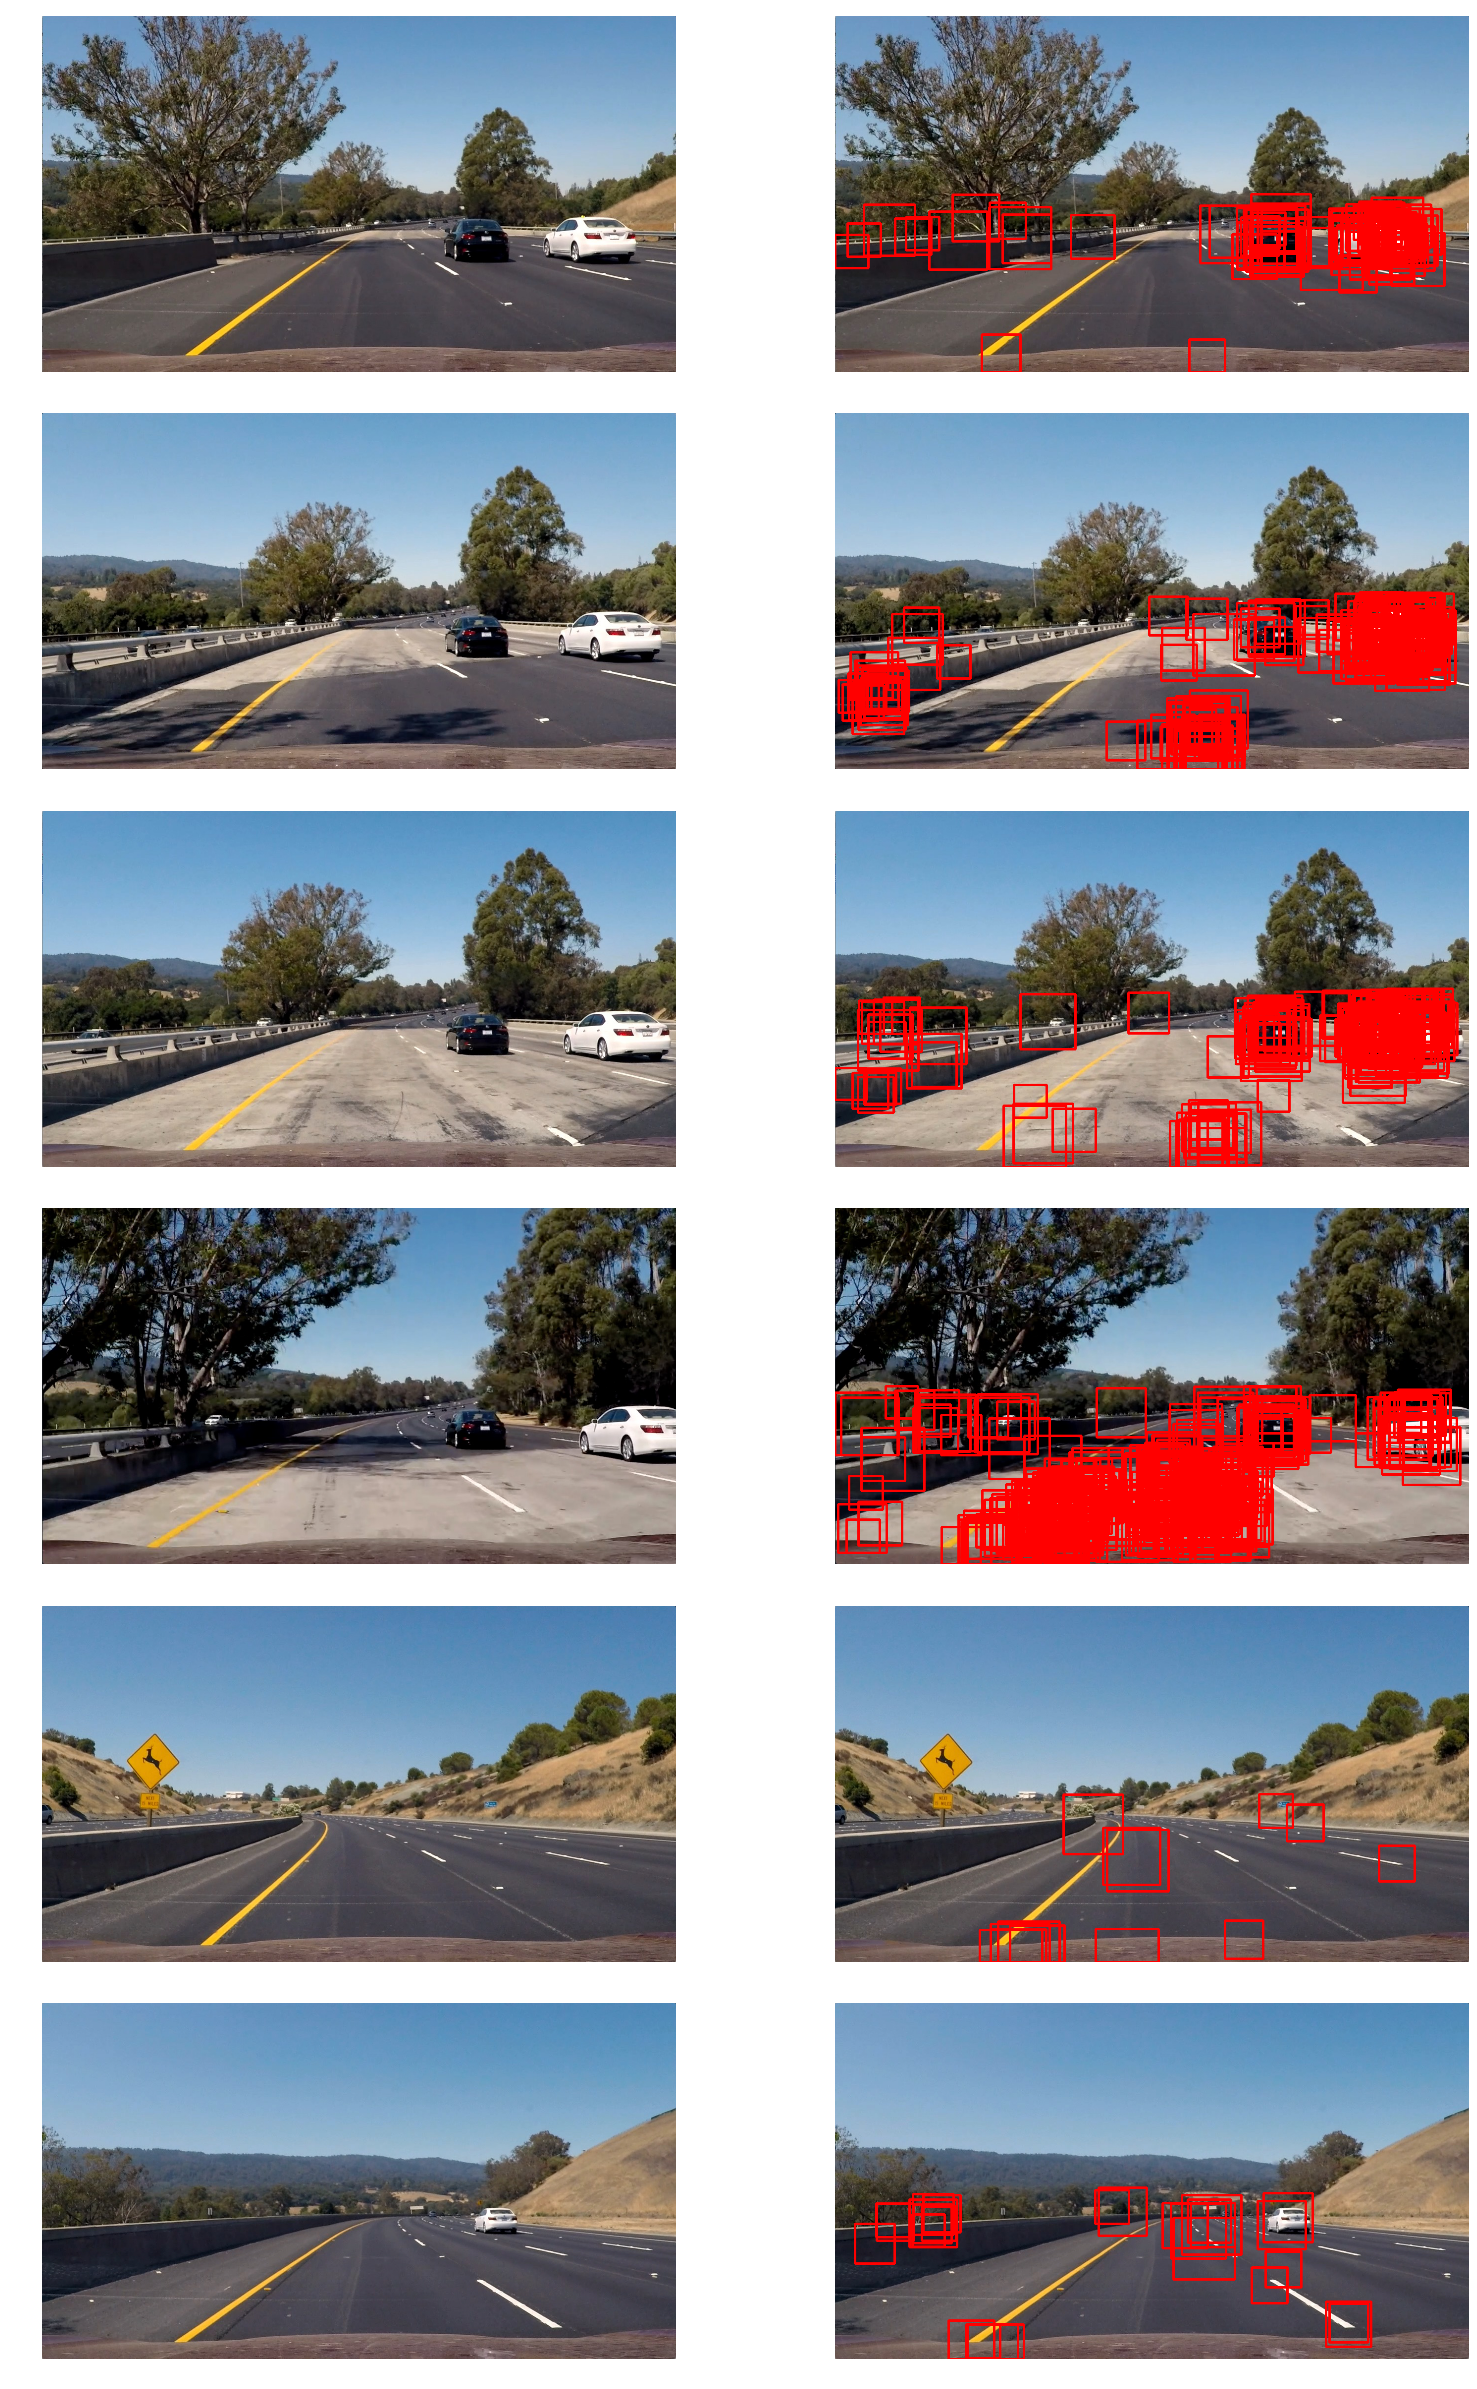

In [57]:
%%time
# detector = detector = sdcvehicle.detection.VehicleDetector()

fig, axes = plt.subplots(len(test_imgs), 2, figsize=(8*2, 4*len(test_imgs)))
fig.tight_layout()
for test_img, ax in zip(test_imgs, axes):
    plot_img = test_img.copy()
    bboxes = detector.detect_in_image(test_img)
    for bbox in bboxes:
        cv2.rectangle(plot_img, tuple(bbox[0]), tuple(bbox[1]), (255, 0, 0), 3)
    ax[0].imshow(test_img)
    ax[0].set_axis_off()
    ax[1].imshow(plot_img)
    ax[1].set_axis_off()

## video

In [25]:
from moviepy.editor import VideoFileClip
video = VideoFileClip("../project_video.mp4")

In [26]:
%time processed_video = detector.detect_in_video(video)

CPU times: user 1.9 s, sys: 4 ms, total: 1.91 s
Wall time: 1.81 s


In [ ]:
processed_video.write_videofile("../processed_project_video.mp4", audio=False)

[MoviePy] >>>> Building video ../processed_project_video.mp4
[MoviePy] Writing video ../processed_project_video.mp4


  0%|          | 1/1261 [00:01<38:39,  1.84s/it]